<class 'pandas.core.frame.DataFrame'>
Index: 600 entries, 0 to 199
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order_ID       600 non-null    object 
 1   Order_Date     600 non-null    object 
 2   Ship_Date      600 non-null    object 
 3   Customer_Name  600 non-null    object 
 4   Segment        600 non-null    object 
 5   Region         600 non-null    object 
 6   Category       600 non-null    object 
 7   Sub_Category   600 non-null    object 
 8   Sales          600 non-null    float64
 9   Quantity       600 non-null    int64  
 10  Discount       600 non-null    float64
 11  Profit         600 non-null    float64
dtypes: float64(3), int64(1), object(8)
memory usage: 60.9+ KB


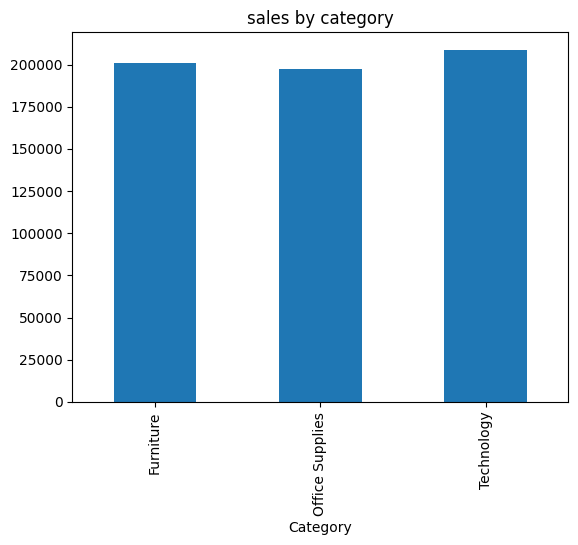

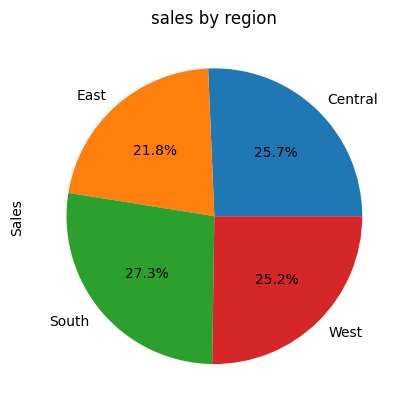

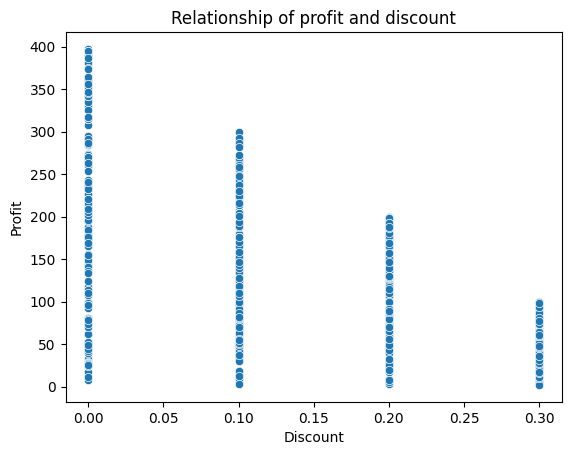

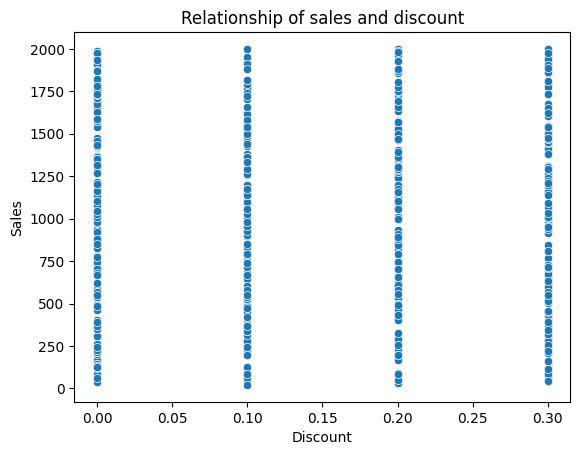

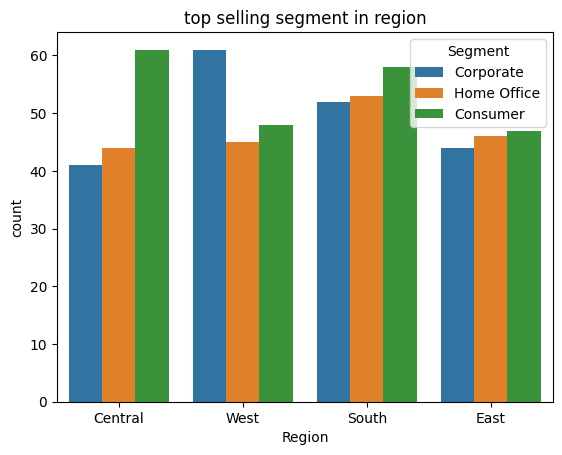

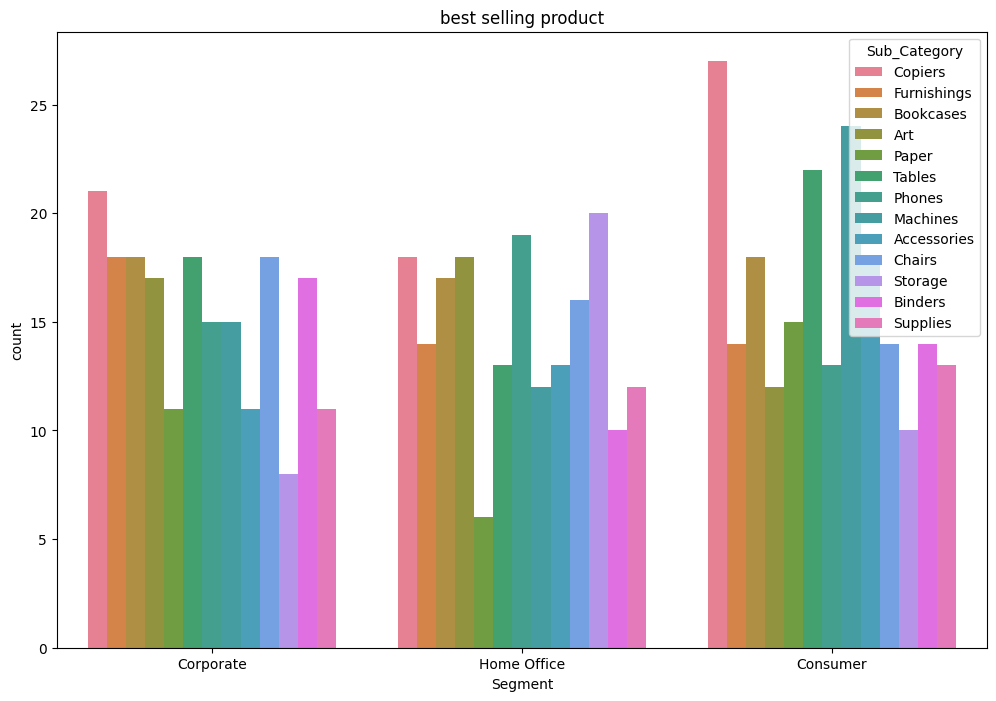

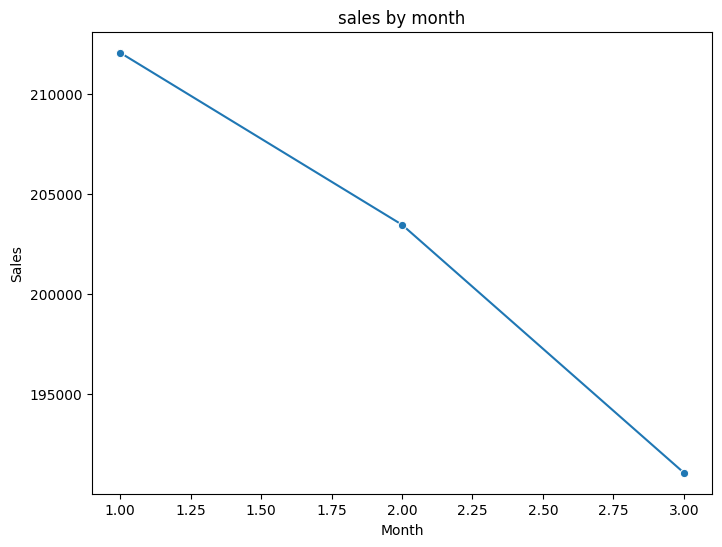

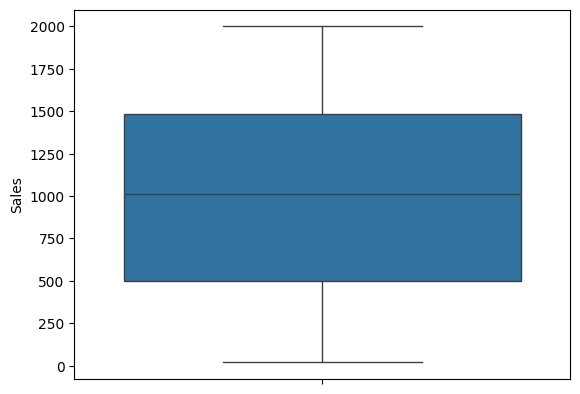

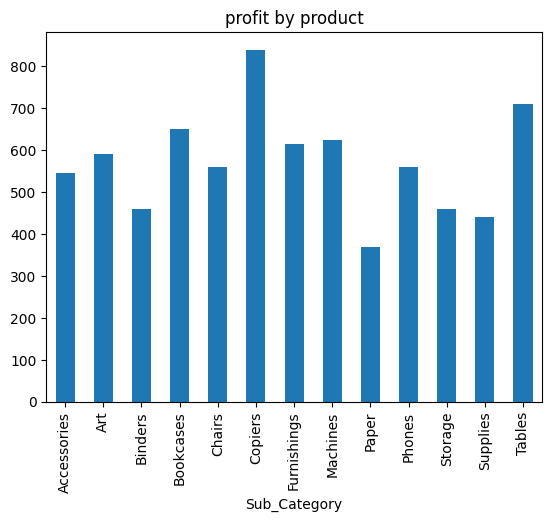

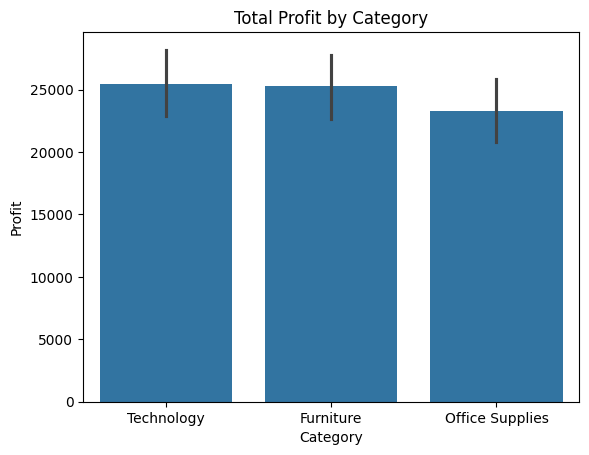

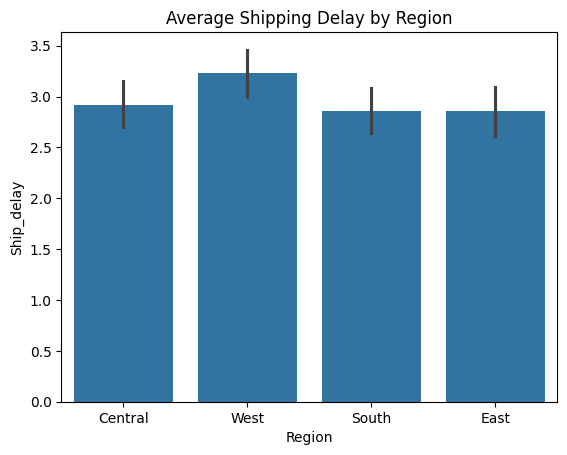

,Order_ID,Order_Date,Ship_Date,Customer_Name,Segment,Region,Category,Sub_Category,Sales,Quantity,Discount,Profit,Month,Profit_margin,Ship_delay
0,CA-202401-1000,2024-01-21,2024-01-24,Barbara Moore,Corporate,Central,Technology,Copiers,651.03,4,0.2,65.10,1,9.999539,3
1,CA-202401-1001,2024-01-22,2024-01-26,John Smith,Home Office,Central,Furniture,Furnishings,209.44,5,0.0,41.89,1,20.000955,4
2,CA-202401-1002,2024-01-08,2024-01-13,Linda Davis,Home Office,West,Furniture,Bookcases,649.78,10,0.1,97.47,1,15.000462,5
3,CA-202401-1003,2024-01-20,2024-01-24,James Taylor,Corporate,South,Technology,Copiers,1482.16,6,0.1,222.32,1,14.999730,4
4,CA-202401-1004,2024-01-14,2024-01-17,Robert Brown,Consumer,West,Office Supplies,Art,1453.70,8,0.0,290.74,1,20.000000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,CA-202403-1195,2024-03-20,2024-03-25,James Taylor,Home Office,East,Office Supplies,Art,1171.67,6,0.2,117.17,3,10.000256,5
196,CA-202403-1196,2024-03-22,2024-03-24,Linda Davis,Corporate,West,Office Supplies,Binders,128.83,9,0.0,25.77,3,20.003105,2
197,CA-202403-1197,2024-03-28,2024-04-01,Mary Johnson,Corporate,Central,Furniture,Furnishings,1174.47,5,0.1,176.17,3,14.999957,4
198,CA-202403-1198,2024-03-24,2024-03-25,Linda Davis,Home Office,South,Office Supplies,Binders,1438.04,9,0.1,215.71,3,15.000278,1


In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

#listing the files
data = os.listdir("SalesData")
data_list = []
for dataRes in data:
    data = pd.read_csv("SalesData/"+dataRes) #reading the files
    data_list.append(data) #appending the each file 

data1 = pd.concat(data_list) #concating each file together

#missing values check
data1.isnull().sum()

#duplicate values check
data1.duplicated().sum()

#info about data
data1.info()

#stats
data1.describe()

#type conversion
data1["Order_Date"] = pd.to_datetime(data1["Order_Date"])
data1["Ship_Date"] = pd.to_datetime(data1["Ship_Date"])

# top one in sales by category?
sales_data = data1.groupby("Category")["Sales"].sum().plot(kind="bar")
plt.title("sales by category")
plt.show()

#sales by region
data1.groupby("Region")["Sales"].sum().plot(kind="pie",autopct="%.1f%%")
plt.title("sales by region")
plt.show()
#insights: overall all region are contributing similar but east has little bit low sales

#relationship betweeen profit and discount
sns.scatterplot(x="Discount",y="Profit",data=data1)
plt.title("Relationship of profit and discount")
plt.show()
#insights: profit is low when discount is high and discount doesnt impact much sales.

#relationship betweeen sales and discount
sns.scatterplot(x="Discount",y="Sales",data=data1)
plt.title("Relationship of sales and discount")
plt.show()
#insights:discount doesnt impact much, it is consistent(sales)

#in region,which segment is performing better
sns.countplot(x="Region",data=data1,hue="Segment")
plt.title("top selling segment in region")
plt.show()
#insights: in central,consumer product are performing.similarly,in west corporate and in south consumer.
#         in east all re performing equal and not much sales

#best selling product in the segment
plt.figure(figsize=(12,8))
sns.countplot(x="Segment",data=data1,hue="Sub_Category")
plt.title("best selling product")
plt.show()

#sales trend by month
plt.figure(figsize=(8,6))
data1["Month"] = data1["Order_Date"].dt.month
monthly_sales = data1.groupby("Month")["Sales"].sum().reset_index()
sns.lineplot(x="Month",y="Sales",data=monthly_sales,marker="o")
plt.title("sales by month")
plt.show()
#insights: sales is dropping each month

#creating a profit_margin variable and ship delay
data1["Profit_margin"] = (data1["Profit"]/data1["Sales"])*100
data1["Ship_delay"] = (data1["Ship_Date"]-data1["Order_Date"]).dt.days

#which product has high profit margin
sns.boxplot(data1["Sales"])
plt.show()

data1.groupby("Sub_Category")["Profit_margin"].sum().plot(kind="bar")
plt.title("profit by product")
plt.show()
#insights: copiers is performing well compared to others,getting high margin

sns.barplot(x="Category", y="Profit", data=data1,estimator=sum)
plt.title("Total Profit by Category")
plt.show()
#insights: all category performing good but tech and furniture performing better

sns.barplot(x="Region",y="Ship_delay",data=data1)
plt.title("Average Shipping Delay by Region")
plt.show()
#insights: in west delay is high

data1.groupby("Sub_Category")["Profit_margin"].sum()
data1

# Summary Insights

# Technology and Furniture categories generate the most profit.
# Copiers are the most profitable sub-category.
# High discounts reduce profit significantly.
# Sales are declining month-to-month (Jan–Mar).
# Shipping delays are higher in the West region.
# All regions contribute evenly to sales, with slight lag in East.